# Chapter 15. Introduction to Multimedia Data
## Notebook for R

### 15.1 Storing, representing, and converting multimedia data

In [1]:
library(magick)
library(glue)
my_image1 = image_read('http://cssbook.net/d/259_3_32_15.jpg')
my_image2 = image_read('http://cssbook.net/d/298_5_52_15.png')
rbind(image_info(my_image1), image_info(my_image2))

Linking to ImageMagick 6.9.9.39
Enabled features: cairo, fontconfig, freetype, lcms, pango, rsvg, webp
Disabled features: fftw, ghostscript, x11



format,width,height,colorspace,matte,filesize,density
<chr>,<int>,<int>,<chr>,<lgl>,<int>,<chr>
JPEG,805,453,sRGB,FALSE,75275,72x72
PNG,1540,978,sRGB,TRUE,2752059,57x57


In [2]:
my_image1_L = image_convert(my_image1, colorspace = 'gray')
print(class(my_image1_L))
my_image1_L_array = as.integer(my_image1_L[[1]])
print(class(my_image1_L_array))
print(dim(my_image1_L_array))


[1] "magick-image"
[1] "array"
[1]  978 1540    1


In [3]:
my_image1_RGB = image_convert(my_image1, colorspace = 'RGB')
print(class(my_image1_RGB))
my_image1_RGB_array = as.integer(my_image1_RGB[[1]])
print(class(my_image1_RGB_array))
print(dim(my_image1_RGB_array))


[1] "magick-image"
[1] "array"
[1] 453 805   3


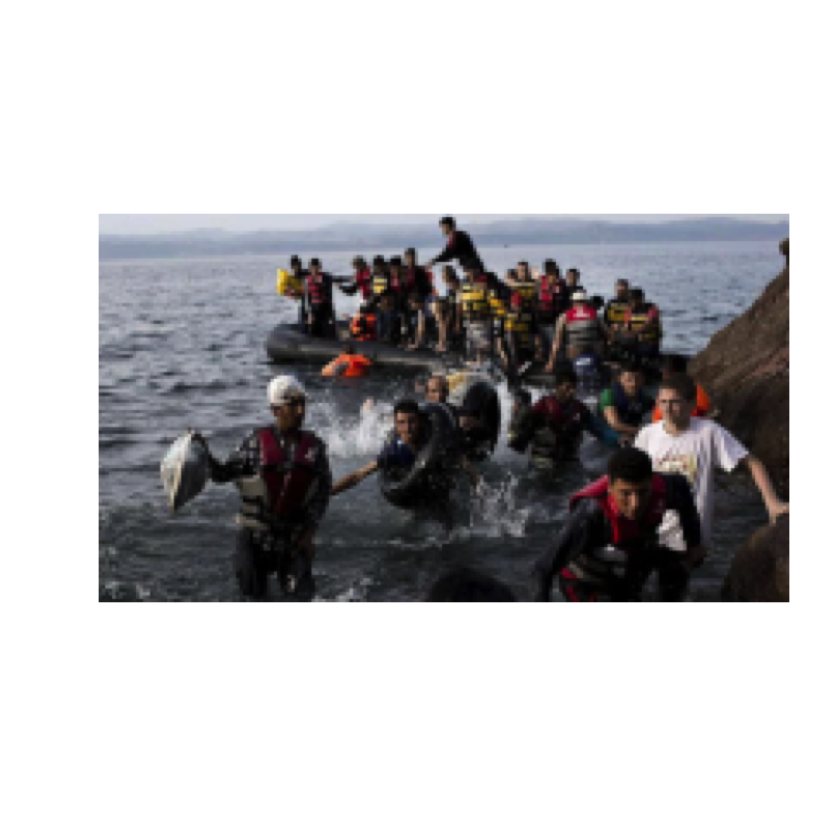

In [4]:
#Resize and visalize my_image1. Reduce to 25%
my_image1_RGB_25 = image_scale(my_image1_RGB, image_info(my_image1_RGB)['width'][[1]]*0.25)
plot(my_image1_RGB_25)

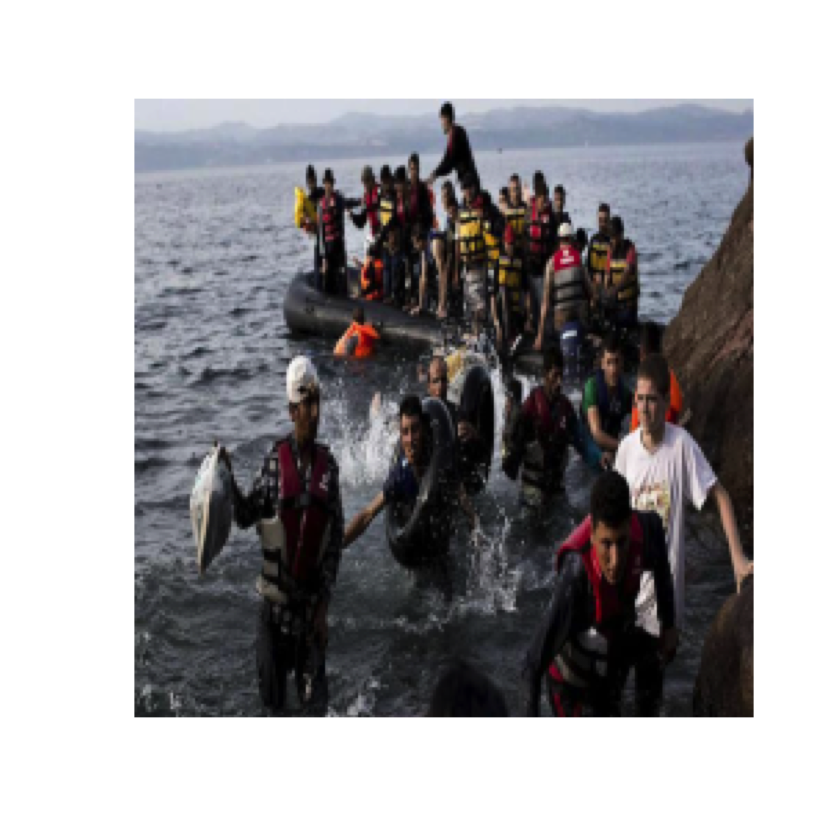

In [5]:
#Resize and visalize my_image1. Resize to 224 x 224
#! indicates to resize width and height exactly
my_image1_RGB_224 = image_scale(my_image1_RGB, "!224x!224")
plot(my_image1_RGB_224)

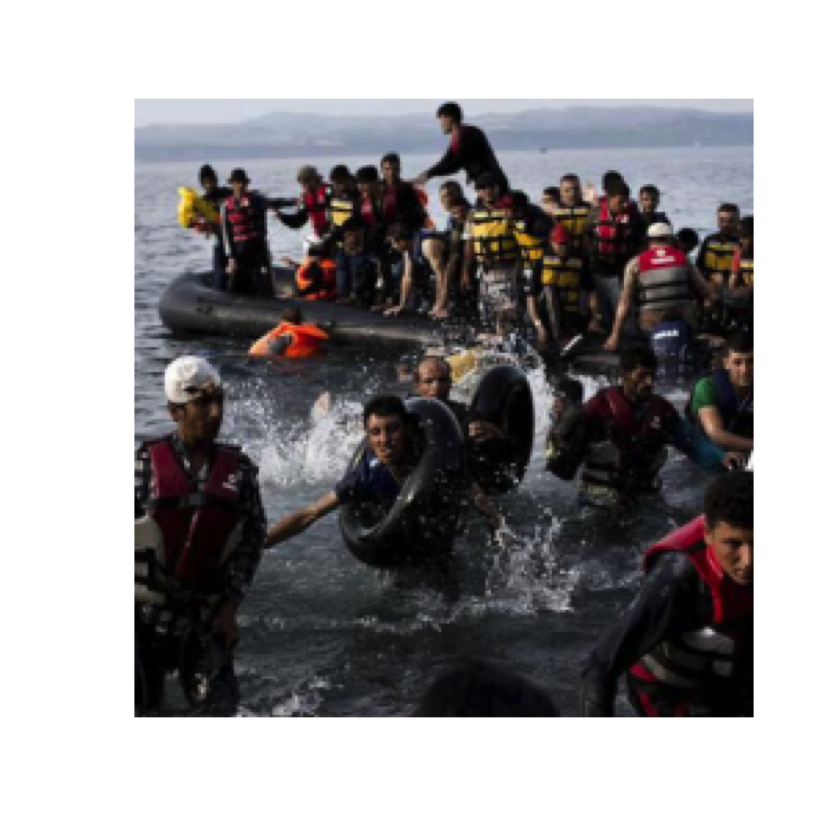

In [6]:
#Crop and resize to 224 x 224
#Create function
crop = function(img) {
    width = image_info(img)['width'][[1]]
    height = image_info(img)['height'][[1]]
    if (width > height) {
        return (image_crop(img, sprintf("%dx%d+%d", height, height, (width-height)/2)))
    }   else  {
        return (image_crop(img, sprintf("%sx%s+%s+%s", width, width, (width-width), (height-width)/2)))
        }
    }

my_image1_RGB_crop = crop(my_image1_RGB)
my_image1_RGB_crop_224 = image_scale(my_image1_RGB_crop, "!224x!224")
plot(my_image1_RGB_crop_224)

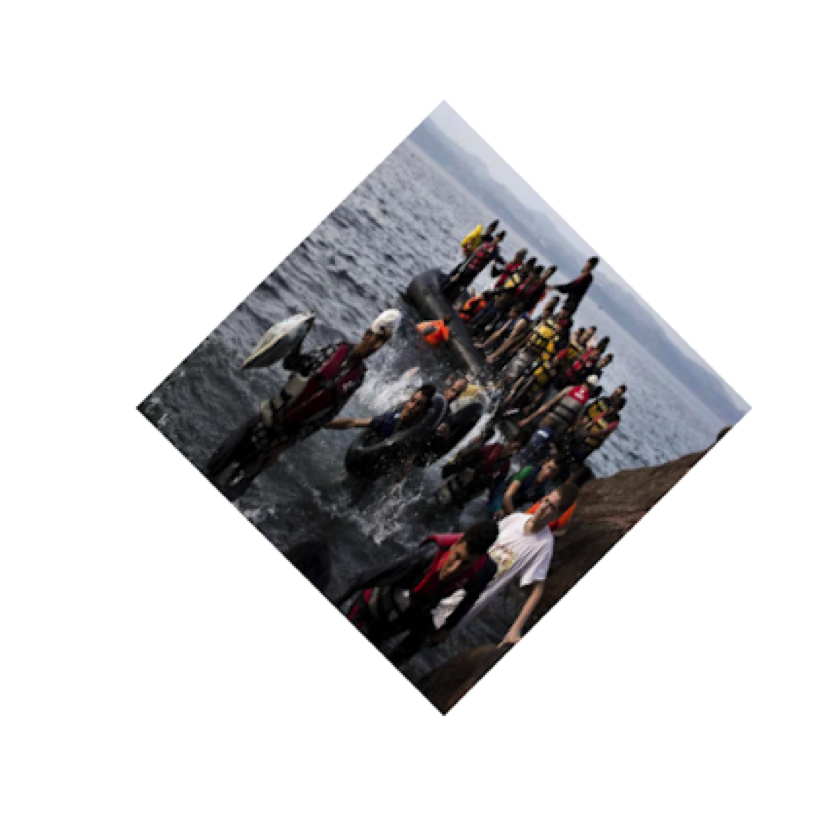

In [7]:
#Rotate 45 degrees
my_image1_RGB_224_rot = image_rotate(my_image1_RGB_224, 45)
plot(my_image1_RGB_224_rot)

In [8]:
#Create two 15x15 small images to compare

#image1
my_image1_RGB_crop_15 = image_scale(my_image1_RGB_crop_224, 15)
img_vect1 = as.integer(my_image1_RGB_crop_15[[1]])
img_vect1 = as.vector(img_vect1)

#image2
my_image2_RGB = image_convert(my_image2, colorspace = 'RGB')
my_image2_RGB_crop = crop(my_image2_RGB)
my_image2_RGB_crop_15 = image_scale(my_image2_RGB_crop, 15)
img_vect2 = as.integer(my_image2_RGB_crop_15[[1]])
img_vect2 = img_vect2[,,-4] #drop the extra channel for comparision
img_vect2 = as.vector(img_vect2)

library(lsa)
matrix = cbind(img_vect1, img_vect2)

cosine(img_vect1, img_vect2)
cosine(matrix)

Warning message:
“package ‘lsa’ was built under R version 3.6.2”
Loading required package: SnowballC



0.8994653


,img_vect1,img_vect2
img_vect1,1.0000000,0.8994653
img_vect2,0.8994653,1.0000000


### 15.2 Image classification

#### 15.2.1 Basic classification with shallow algorithms

In [9]:
library(tidyverse)
library(dslabs)
library(glue)

mnist = read_mnist()

X_train = mnist$train$images
y_train = factor(mnist$train$labels)
X_test = mnist$test$images
y_test = factor(mnist$test$labels)

glue("Shape = ")
dim(mnist$train$images)
glue("Numbers in training set = ")
print(factor(y_train[1:10]), max.levels = 0)
glue("Numbers in test set = ")
print(factor(y_test[1:10]), max.levels = 0)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks glue::collapse()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()



Shape =

[1] 60000   784

Numbers in training set =

 [1] 5 0 4 1 9 2 1 3 1 4


Numbers in test set =

 [1] 7 2 1 0 4 1 4 9 5 9


In [10]:
#Multiclass classification with RandomForest
library(randomForest)
library(caret)
rf_clf = randomForest(X_train, y_train, ntree=100)
rf_clf
predict(rf_clf, X_test[1:10,])
predictions = predict(rf_clf, X_test)
cm = confusionMatrix(predictions, y_test)
print(cm$overall["Accuracy"])

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift





Call:
 randomForest(x = X_train, y = y_train, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 28

        OOB estimate of  error rate: 3.45%
Confusion matrix:
     0    1    2    3    4    5    6    7    8    9 class.error
0 5846    1    9    5    6    6   14    1   32    3  0.01300017
1    1 6637   37   14   11    5    9   10   12    6  0.01557401
2   27   12 5755   25   28    4   23   36   39    9  0.03407184
3    3    4   87 5817    5   71    6   48   58   32  0.05121514
4   10    7    9    3 5654    3   30   10   16  100  0.03218076
5   21    4    8   71    8 5195   42    5   39   28  0.04168973
6   25   11    4    1   12   39 5809    0   16    1  0.01841838
7    5   20   58    9   34    1    0 6061   11   66  0.03256185
8   12   38   36   49   20   53   26    6 5534   77  0.05417877
9   20    9   16   64   88   25    5   52   45 5625  0.05446293

1  2  3  4  5  6  7  8  9 10 
 7  2  1  0  4  1  4  9  6  9 
Levels: 0 1 2 3 4 5 6 7 8 9

Accuracy 
  0.9691 


#### 15.2.1 Deep Learning for Image Analysis

In [11]:
library(tensorflow)
library(keras)
fashion_mnist <- dataset_fashion_mnist()
c(X_train, y_train) %<-% fashion_mnist$train
c(X_test, y_test) %<-% fashion_mnist$test

class_names = c('T-shirt/top','Trouser', 'Pullover','Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag','Ankle boot')

X_train <- X_train / 255
y_test <- y_test / 255

print(dim(X_train))
print(dim(X_test))

Warning message:
“package ‘tensorflow’ was built under R version 3.6.2”

Attaching package: ‘tensorflow’


The following object is masked from ‘package:caret’:

    train


Warning message:
“package ‘keras’ was built under R version 3.6.2”


[1] 60000    28    28
[1] 10000    28    28


In [12]:
model = keras_model_sequential()
model %>%
  layer_flatten(input_shape = c(28, 28)) %>%
  layer_dense(units = 300, activation = 'relu') %>%
  layer_dense(units = 100, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'softmax')
model

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten (Flatten)                   (None, 784)                     0           
________________________________________________________________________________
dense (Dense)                       (None, 300)                     235500      
________________________________________________________________________________
dense_1 (Dense)                     (None, 100)                     30100       
________________________________________________________________________________
dense_2 (Dense)                     (None, 10)                      1010        
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________________________________________



In [13]:
model %>% compile(
  optimizer = 'sgd', 
  loss = 'sparse_categorical_crossentropy',
  metrics = c('accuracy')
)
history = model %>% fit(X_train, y_train, validation_split = 0.1, epochs =5, verbose = 2)
print(history$metrics)
score = model %>% evaluate(test_images, test_labels, verbose = 0)
glue('Evaluation')
print(score)

$loss
[1] 0.7255158 0.4923369 0.4453345 0.4178082 0.3969852

$accuracy
[1] 0.7633519 0.8292222 0.8435556 0.8542778 0.8622593

$val_loss
[1] 0.5811644 0.4684601 0.4389609 0.4139460 0.4023611

$val_accuracy
[1] 0.7863333 0.8321667 0.8453333 0.8591667 0.8561667



ERROR: Error in is_tensorflow_dataset(x): objeto 'test_images' no encontrado


In [14]:
img = X_test[1:6, , , drop = FALSE]
class_pred = model %>% predict_classes(img)
class_pred

[1] 9 2 1 1 6 1

#### 15.2.2 Deep Learning for Image Analysis

In [148]:
library(tensorflow)
library(keras)
fashion_mnist <- dataset_fashion_mnist()
c(X_train, y_train) %<-% fashion_mnist$train
c(X_test, y_test) %<-% fashion_mnist$test
class_names = c('T-shirt/top','Trouser', 'Pullover','Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag','Ankle boot')
X_train <- X_train / 255
y_test <- y_test / 255
print(dim(X_train))
print(dim(X_test))

[1] 60000    28    28
[1] 10000    28    28


In [150]:
model = keras_model_sequential()
model %>%
layer_flatten(input_shape = c(28, 28)) %>%
layer_dense(units = 300, activation = 'relu') %>%
layer_dense(units = 100, activation = 'relu') %>%
layer_dense(units = 10, activation = 'softmax')
model

Model
Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_1 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_3 (Dense)                     (None, 300)                     235500      
________________________________________________________________________________
dense_4 (Dense)                     (None, 100)                     30100       
________________________________________________________________________________
dense_5 (Dense)                     (None, 10)                      1010        
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________________________________________



#### 15.2.3 Fine tuning an open source  CNN

In [161]:
model_resnet50 = application_resnet50(weights = 'imagenet')
#model_resnet50

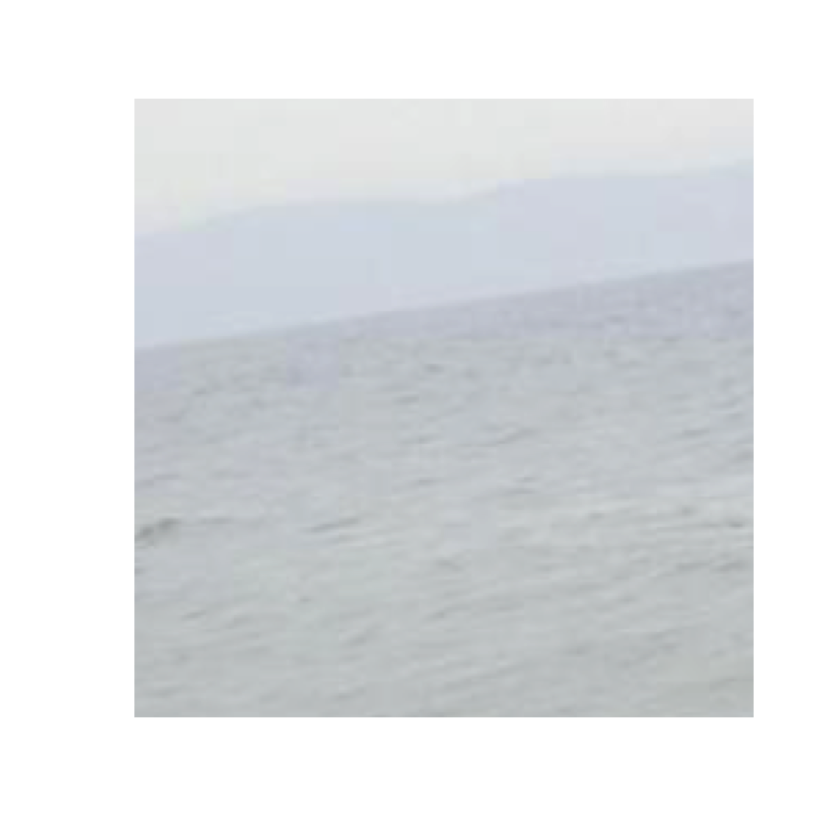

In [145]:
picture1 = image_crop(my_image2_RGB, "224x224+50+50")
plot(picture1)
picture1 = as.integer(picture1[[1]])
picture1 = picture1[,,-4] #drop the extra channel for comparision
picture1 = array_reshape(picture1, c(1, dim(picture1)))
picture1 = imagenet_preprocess_input(picture1)

In [157]:
preds1 = model_resnet50 %>% predict(picture1)
imagenet_decode_predictions(preds1, top = 3)[[1]]

class_name,class_description,score
<chr>,<chr>,<dbl>
n09421951,sandbar,0.07926153
n04347754,submarine,0.04810236
n02066245,grey_whale,0.04798749


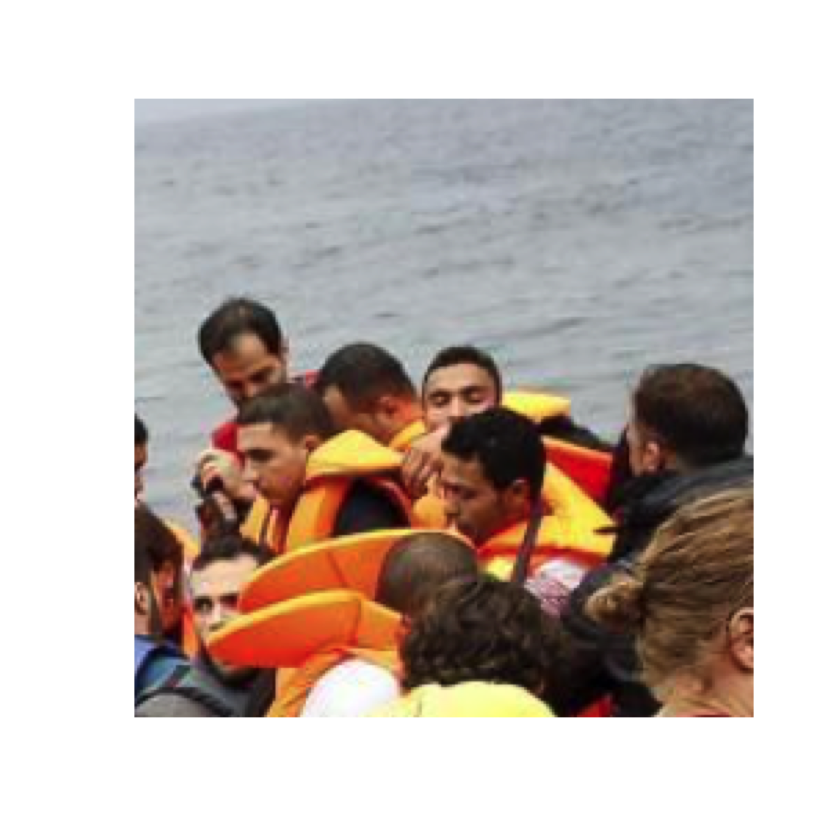

In [146]:
picture2 = image_crop(my_image2_RGB, "224x224+1000")
plot(picture2)
picture2 = as.integer(picture2[[1]])
picture2 = picture2[,,-4] #drop the extra channel for comparision
picture2 = array_reshape(picture2, c(1, dim(picture2)))
picture2 = imagenet_preprocess_input(picture2)

In [158]:
preds2 = model_resnet50 %>% predict(picture2)
imagenet_decode_predictions(preds2, top = 3)[[1]]

class_name,class_description,score
<chr>,<chr>,<dbl>
n03662601,lifeboat,0.39761350
n04273569,speedboat,0.11085811
n02704792,amphibian,0.06916212


### 15.3 Using existing libraries and APIs